In [1]:
import csv
import glob

# Specify the directory containing the csv files
csv_directory = 'bn_results_gpt'  # Replace with your directory path

# Find all csv files in the directory
csv_files = glob.glob(f'{csv_directory}/*.csv')

# Open the aggregate csv file for writing
with open('rollout_results_gpt.csv', 'w', newline='') as aggregate_file:
    csv_writer = csv.writer(aggregate_file)

    # Go through all the csv files
    for file in csv_files:
        with open(file, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Get the last row
            last_row = None
            for row in csv_reader:
                last_row = row

            if last_row:
                # Extract the first and third columns
                result = last_row[0]

                # Write the row to the aggregate file
                csv_writer.writerow(result)

In [6]:
import numpy as np
import csv

# Replace this with the path to your CSV file
csv_file_path = 'rollout_results_human.csv'

# Read the CSV file and extract columns into lists
col1 = []
col2 = []

with open(csv_file_path, 'r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        col1.append(float(row[0]))  # Assuming the values are of float type
        col2.append(float(row[1]))  # Assuming the values are of float type

# Convert the lists to NumPy arrays
col1_array = np.array(col1)
col2_array = np.array(col2)

# Print the resulting NumPy arrays
print("Column 1 Array:")
print(col1_array)

print("\nColumn 2 Array:")
print(col2_array)

Column 1 Array:
[ 7.63001607  6.95871904  8.46783344  6.95140688  6.78593103  8.56511172
  7.24777319  6.7222957   8.7766804   7.22261525  7.32789112  7.04009488
  7.70785371  6.52531594  6.96210594  6.44715234 11.01834472  7.65249411
 10.09585429  8.12192057  7.17170933]

Column 2 Array:
[0.3  2.4  3.25 3.6  3.4  0.   3.65 3.95 1.8  2.85 0.   3.25 1.95 4.1
 1.5  3.   4.1  3.45 3.1  0.45 2.85]


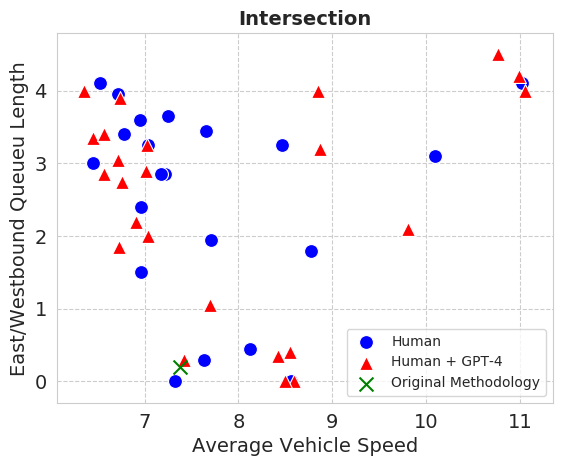

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {"grid.linestyle":"--"})
fs = 14


# # Assuming you have two sets of NumPy arrays 'x1_array', 'y1_array', 'x2_array', and 'y2_array'
# x1_array = np.array([1, 2, 3, 4, 5])
# y1_array = np.array([2, 4, 6, 8, 10])
# x2_array = np.array([1.5, 2.5, 3.5, 4.5, 5.5])
# y2_array = np.array([3, 6, 9, 12, 15])

csv_file_path = 'rollout_results_human.csv'

# Read the CSV file and extract columns into lists
x1_array = []
y1_array = []

with open(csv_file_path, 'r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        x1_array.append(float(row[0]))  # Assuming the values are of float type
        y1_array.append(float(row[1]))  # Assuming the values are of float type

# Convert the lists to NumPy arrays
x1_array = np.array(x1_array) # Human
y1_array = np.array(y1_array)

csv_file_path = 'rollout_results_gpt.csv'

# Read the CSV file and extract columns into lists
x2_array = []
y2_array = []

with open(csv_file_path, 'r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        x2_array.append(float(row[0]))  # Assuming the values are of float type
        y2_array.append(float(row[1]))  # Assuming the values are of float type

# Convert the lists to NumPy arrays
x2_array = np.array(x2_array) # Human + GPT
y2_array = np.array(y2_array)

# HUMAN
# Create a scatter plot using seaborn for the first set of data
sns.scatterplot(x=x1_array, y=y1_array, marker='o', s=100, color='blue', label='Human')

# HUMAN + GPT
# Create a scatter plot using seaborn for the second set of data
sns.scatterplot(x=x2_array, y=y2_array, marker='^', s=100, color='red', label='Human + GPT-4')

# Plot the additional point with a different color and marker style
plt.scatter(7.38, 0.2, c='green', marker='x', s=100, label='Original Methodology')

# Set plot title and axis labels
plt.title('Intersection', fontsize = fs, fontweight="bold")
plt.xlabel('Average Vehicle Speed', fontsize = fs)
plt.ylabel('East/Westbound Queueu Length', fontsize = fs)

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

# ax.set_title("Intersection", fontsize = fs, fontweight="bold")
# ax.set_ylabel("Normalized Reward", fontsize = fs)
# ax.set_xlabel("Episode", fontsize = fs)
# ax.tick_params(axis='both', which='major', labelsize=fs)

# Display legend to identify the two sets of data
plt.legend()

# Display the plot
plt.show()